# Logistic Regression Implementations **(1 Feature)**

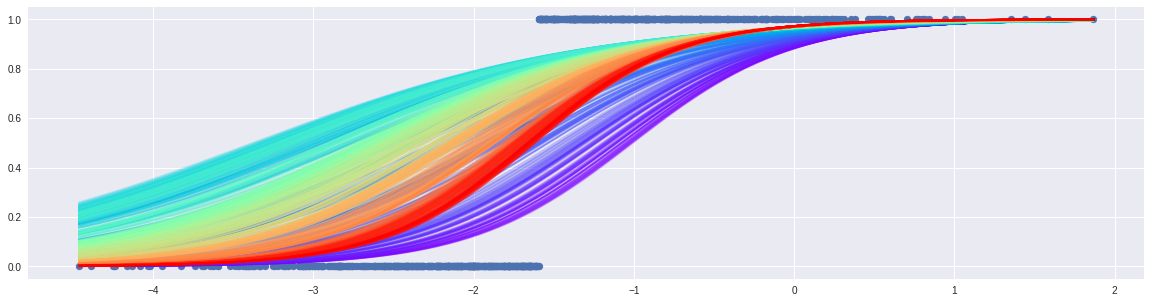

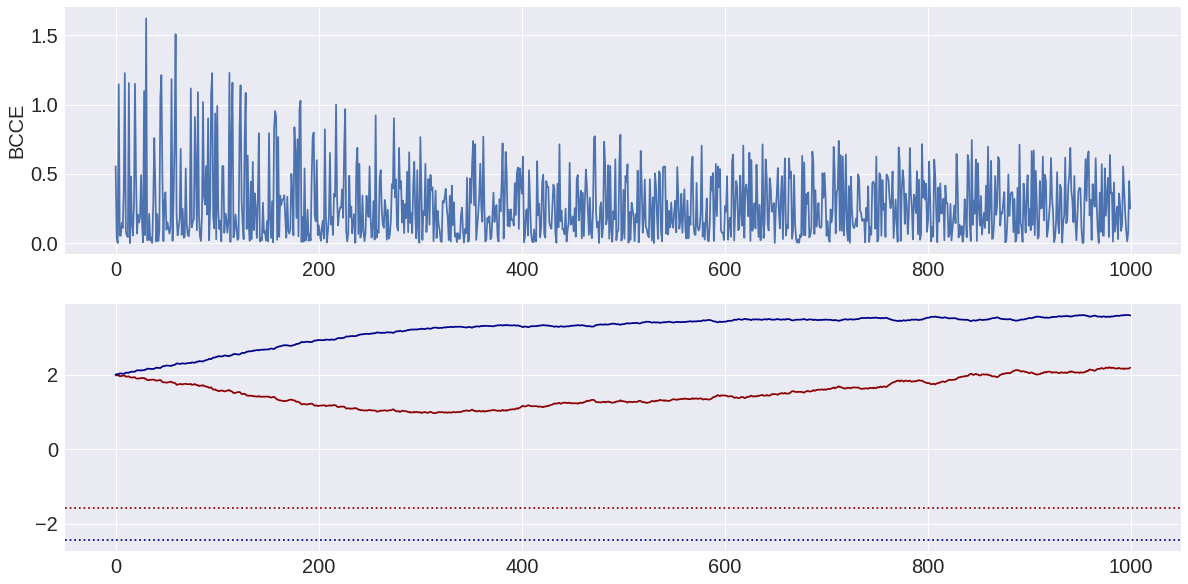

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

# set params
N = 1000
lr = 0.03
t_W = np.random.uniform(-3, 3, (1, ))
t_b = np.random.uniform(-3, 3, (1, ))


W = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

# generate dataset
db = -t_b/t_W  #decision boundary
x_data = np.random.normal(db, 1 , size=(N,) )
y_data = x_data * W + b
y_data = (y_data > db).astype(np.int)

fig, ax = plt.subplots(figsize=(20,5))
ax.scatter(x_data, y_data)

x_range = np.linspace(x_data.min(), x_data.max(), 100)
cmap = cm.get_cmap('rainbow', lut=N)
J_track = list()
W_track, b_track = list(), list()
for data_idx, (x,y) in enumerate(zip(x_data, y_data)):
  W_track.append(w)
  b_track.append(b)

  # visualize updated model
  y_range = w*x_range + b
  y_range = 1/(1 + np.exp(-y_range))
  ax.plot(x_range, y_range, color=cmap(data_idx), alpha=0.3)
  
  # forward propagation
  z = x*W + b
  pred = 1/(1+np.exp(-z))
  J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
  J_track.append(J)

  # Jacobians
  dJ_dpred = (pred - y)/(pred*(1-pred))
  dpred_dz = pred*(1-pred)
  dz_dw = x
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred * dpred_dz
  dJ_dw = dJ_dz * dz_dw
  dJ_db = dJ_dz * dz_db

  # parameter update
  w = w - lr*dJ_dw
  b = b - lr*dJ_db

# visualize loss
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[0].set_ylabel('BCCE', fontsize=20)
axes[0].tick_params(labelsize=20)

axes[1].axhline(y=t_W, color='darkred', linestyle=':')
axes[1].plot(W_track, color='darkred')
axes[1].axhline(y=t_b, color='darkblue', linestyle=':')
axes[1].plot(b_track, color='darkblue')
axes[1].tick_params(labelsize=20)

## decision boundary

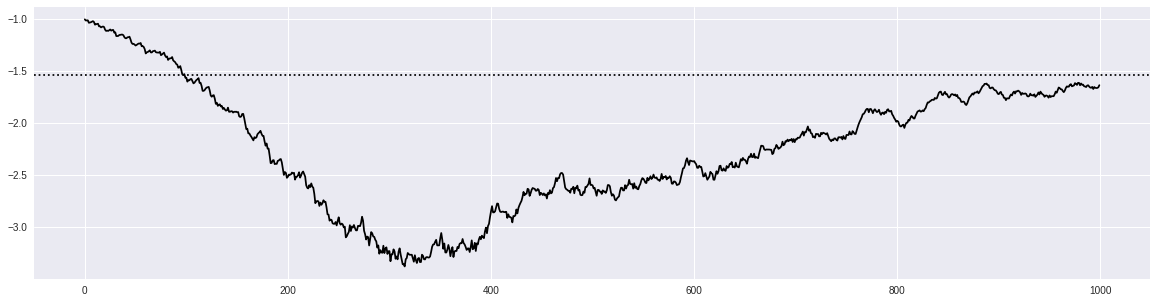

In [33]:
w_track = np.array(w_track)
b_track = np.array(b_track)

db_track = -b_track/W_track
db = -t_b / t_W

fig, ax = plt.subplots(figsize=(20,5))
ax.axhline(y=db, color='black',linestyle=':')
ax.plot(db_track, color='black')

decision boundary는 유지한 상태에서 loss를 줄이기 위해서 step function형태로 함수가 변하는 것이다.

# Logistic Regression Implementations **(N Features)**

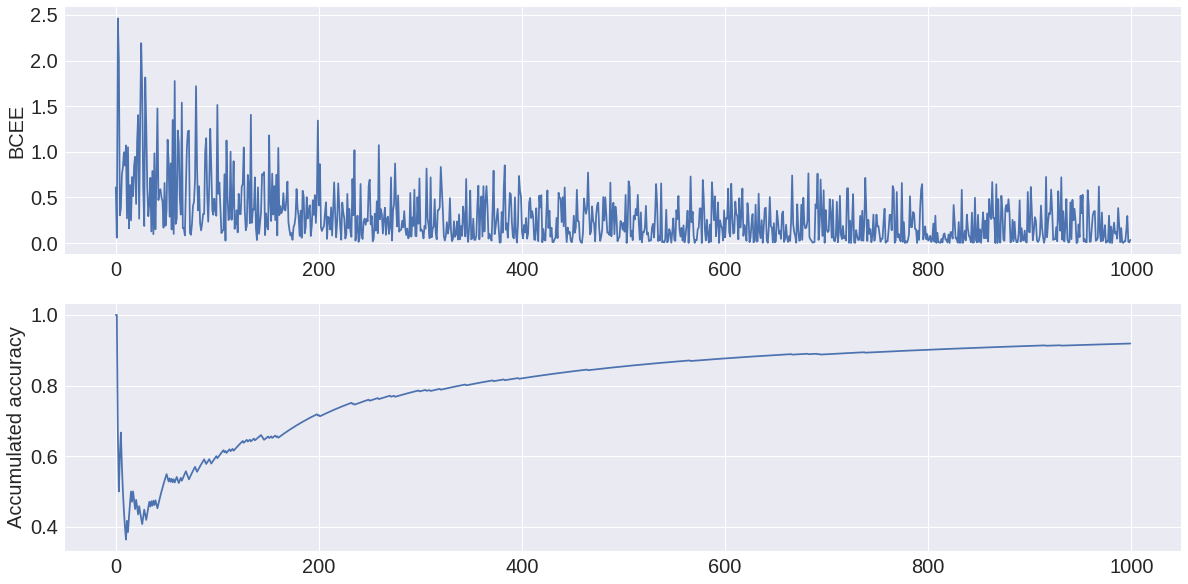

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.style.use('seaborn')

# set params
N, n_feature = 1000, 3
lr = 0.03
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1,))
W = np.random.uniform(-1, 1, (n_feature, 1)) # initial W, b
b = np.random.uniform(-1, 1, (1,))

# generate dataset
x_data = np.random.randn(N, n_feature)
y_data = x_data @ t_W + t_b
y_data = 1/(1+np.exp(-y_data))  
y_data = (y_data > 0.5).astype(np.int)

J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (X, y) in enumerate(zip(x_data, y_data)):
  # forward propagation
  z = X @ W + b
  pred = 1/(1 + np.exp(-z))
  J = -(y*np.log(pred) + (1-y)*np.log(1-pred))
  J_track.append(J.squeeze()) # scalar

  # calculate accumulated accuracy
  pred_ = (pred > 0.5).astype(np.int).squeeze()
  if pred_ == y:
    n_correct += 1
  acc_track.append(n_correct/(data_idx + 1))

  # Jacobians
  dJ_dpred = (pred - y) / (pred*(1-pred))
  dpred_dz = pred*(1-pred)
  dz_dw = X.reshape(1,-1)
  dz_db = 1

  # backpropagation
  dJ_dz = dJ_dpred * dpred_dz
  dJ_dw = dJ_dz * dz_dw
  dJ_db = dJ_dz * dz_db

  # parameter update
  W = W - lr*dJ_dw.T
  b = b - lr*dJ_db

# visualize results
fig, axes = plt.subplots(2, 1, figsize=(20,10))
axes[0].plot(J_track)
axes[1].plot(acc_track)

axes[0].set_ylabel('BCEE', fontsize=20)
axes[0].tick_params(labelsize=20)
axes[1].set_ylabel('Accumulated accuracy', fontsize=20)
axes[1].tick_params(labelsize=20)